In [2]:
import pandas as pd

In [3]:
sales_data = pd.read_csv('Updated_Sales_Dataset.csv')

# Convert 'Transaction Date' to datetime format
sales_data['Transaction Date'] = pd.to_datetime(sales_data['Transaction Date'])

# Display the first few rows of the dataset
sales_data.head()


,Transaction ID,Customer ID,Product ID,Transaction Date,Purchase Hour,Quantity,Price,Discounts,Payment Method,Product Category,...,Return Status,Shipping Cost,Promotion Used,Customer Log Type,Product Description,Profit,Priority Order,Sales,Weekend or Weekday,Month
0,7965,1091,103,2023-01-01,12,4,349.59,0.20,E-wallet,Fashion,...,Returned,10.24,Yes,Guest,Watch,132.253148,Medium,1173.494904,Weekend,1
1,8617,1034,126,2023-01-01,15,2,264.19,0.08,Credit Card,Electronics,...,Not Returned,16.95,Yes,Member,Camera,161.452391,Low,571.864043,Weekend,1
2,8777,1001,115,2023-01-01,19,3,468.64,0.20,E-wallet,Electronics,...,Not Returned,19.31,No,Member,Smartphone,349.041252,Medium,1319.092580,Weekend,1
3,1716,1014,125,2023-01-01,12,8,231.71,0.01,Cash,Electronics,...,Not Returned,6.60,Yes,Member,Camera,548.295176,Low,2802.872258,Weekend,1
4,3164,1010,103,2023-01-01,1,7,17.26,0.16,E-wallet,Home & Garden,...,Returned,13.83,Yes,Member,Chair,22.624874,High,144.227514,Weekend,1


In [4]:
import datetime as dt

# Set the current date for recency calculation (e.g., the day after the last transaction date in the dataset)
current_date = sales_data['Transaction Date'].max() + dt.timedelta(days=1)

# Calculate RFM metrics
rfm = sales_data.groupby('Customer ID').agg({
    'Transaction Date': lambda x: (current_date - x.max()).days,  # Recency
    'Transaction ID': 'count',  # Frequency
    'Sales': 'sum'  # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

# Display the RFM table
rfm.head()


,Customer ID,Recency,Frequency,Monetary
0,1000,2,90,106438.122923
1,1001,1,103,103319.124929
2,1002,1,110,126994.756878
3,1003,1,87,106096.007908
4,1004,1,93,96826.978018


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardize the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Apply k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Display the RFM table with cluster labels
rfm.head()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Customer ID,Recency,Frequency,Monetary,Cluster
0,1000,2,90,106438.122923,0
1,1001,1,103,103319.124929,3
2,1002,1,110,126994.756878,1
3,1003,1,87,106096.007908,0
4,1004,1,93,96826.978018,0


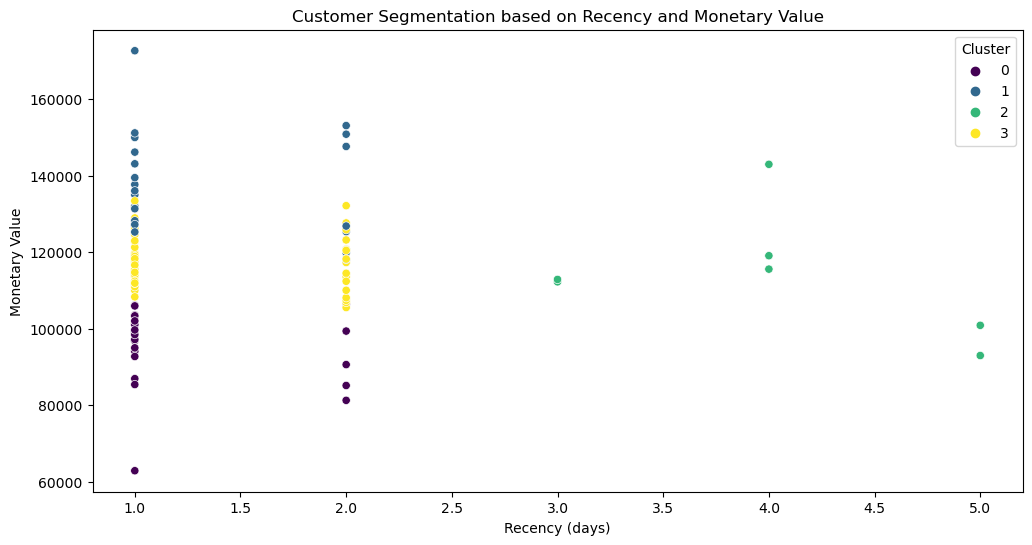

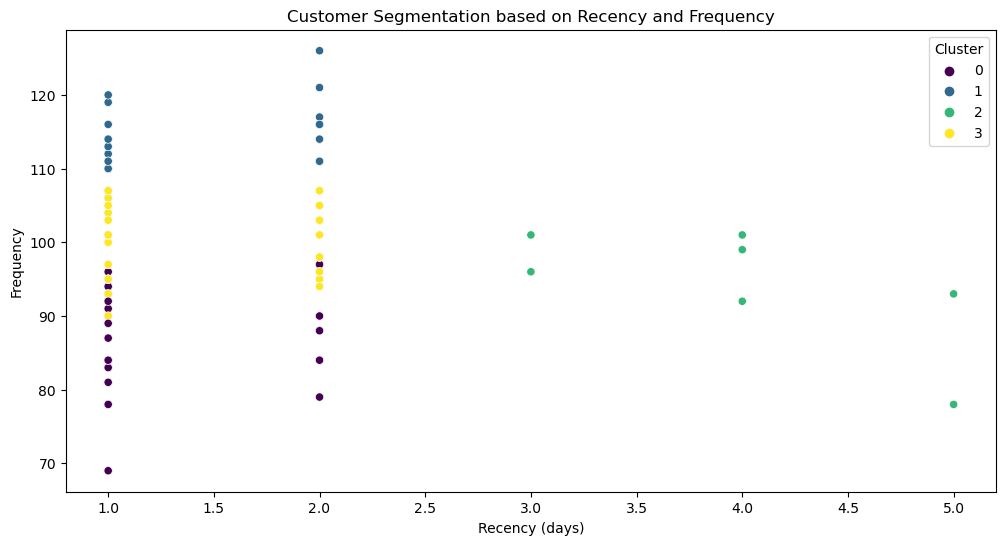

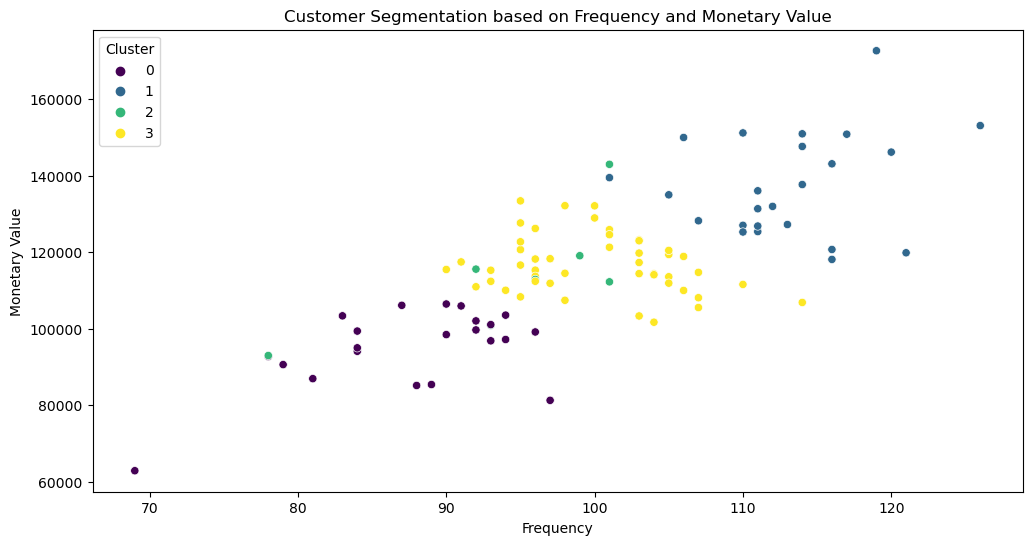

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of RFM clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation based on Recency and Monetary Value')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary Value')
plt.show()

# Plot the distribution of clusters based on Recency and Frequency
plt.figure(figsize=(12, 6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation based on Recency and Frequency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of clusters based on Frequency and Monetary Value
plt.figure(figsize=(12, 6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation based on Frequency and Monetary Value')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.show()
